# Internal Gravity Waves

In [1]:
%matplotlib inline

import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import lib

First up we load the 3 Matlab workspaces that provide all the data for reproducing Petersen's plots.

In [2]:
data = scipy.io.loadmat('../data/m52_igw_m52a-x.mat')
data2 = scipy.io.loadmat('../data/fig13e.mat')
data3 = scipy.io.loadmat('../data/m52_igw_m52a-x_vert_transport.mat')

We also define the different horizontal viscosities across which the experiments were performed.

In [3]:
nu_h = ['0.01', '1', '15', '150']

# Figure 7a

MOM6 performs remarkably well in this test case!

In [4]:
t, rpeNorm = lib.rpe_norm('/scratch/mizuchi1/angus/spurious/internal_waves/internal_waves_KH0.01/prog.nc')

(-1e-06, 9e-06)

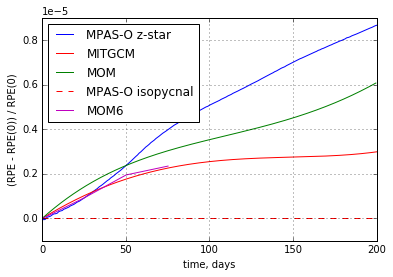

In [7]:
plt.plot(data['time'][0,:] / 3600 / 24, data['rpeNorm'][:,0], '-')
    
plt.plot(data2['mitgcm_time_days'][0,:], data2['mitgcm_rpe'][0,:], 'r-')
plt.plot(data2['mom_time_days'][0,:], data2['mom_rpe'][0,:], '-')
plt.plot(data2['gold_time_days'][0,:], data2['gold_rpe'][:,0], '--')
plt.plot(t / 24, -rpeNorm, 'm-')

plt.grid()
plt.xlabel('time, days')
plt.ylabel('(RPE - RPE(0)) / RPE(0)')
plt.legend(['MPAS-O z-star', 'MITGCM', 'MOM', 'MPAS-O isopycnal', 'MOM6'], loc='upper left')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().set_ylim(-1e-6, 9e-6)

# Figure 7b

Here's the time-evolution of RPE for different grid Reynolds numbers. The MOM6 data is added in dashed lines. The timeseries appear basically identical regardless of grid Reynolds number, suggesting that horizontal viscosity isn't affecting spurious mixing at all in this case.

In [8]:
rpeNorm_g = {}
for nu in nu_h:
    rpeNorm_g[nu] = lib.rpe_norm('/scratch/mizuchi1/angus/spurious/internal_waves/internal_waves_KH{}/prog.nc'.format(nu))

(0.0, 200.0, -5.6823990923429625e-08, 8.6589456175624799e-06)

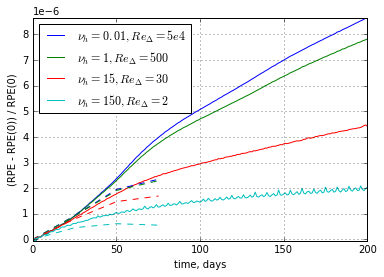

In [11]:
for j in range(4):
    plt.plot(data['time'][0,:] / 3600 / 24, data['rpeNorm'][:,j], '-')
    
plt.gca().set_prop_cycle(None)
    
for nu in nu_h:
    plt.plot(rpeNorm_g[nu][0] / 24, -rpeNorm_g[nu][1], '--')
    
plt.grid()
plt.xlabel('time, days')
plt.ylabel('(RPE - RPE(0)) / RPE(0)')
plt.legend([
        r'$\nu_h=0.01, Re_\Delta=5e4$',
        r'$\nu_h=1, Re_\Delta=500$',
        r'$\nu_h=15, Re_\Delta=30$',
        r'$\nu_h=150, Re_\Delta=2$'],
          loc='upper left')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.axis('tight')

# Figure 7c
dRPE/dt for multiple models. I've also included MOM6 with `REGRID_TIME_SCALE` set to 1 day, to compare to MPAS z-tilde cases. Curiously, this has a slightly higher rate of RPE change than when regridding is instantaneous.

In [15]:
drpe = np.array([lib.drpe_dt('/scratch/mizuchi1/angus/spurious/internal_waves/internal_waves_KH{}/prog.nc'.format(nu)) for nu in nu_h])
vel_scale = np.array([lib.vel_scale('/scratch/mizuchi1/angus/spurious/internal_waves/internal_waves_KH{}/ocean.stats.nc'.format(nu)) for nu in nu_h])
gridRe = np.mean(vel_scale[:,39:], 1) * 5e3 / np.array(list(map(float, nu_h)))

In [26]:
drpe_t = np.array([lib.drpe_dt('../mine/internal_waves_KH{}_tilde.nc'.format(nu)) for nu in nu_h])
vel_scale_t = np.array([lib.vel_scale('../mine/internal_waves_energy_KH{}_tilde.nc'.format(nu)) for nu in nu_h])
gridRe_t = np.mean(vel_scale_t[:,10:100], 1) * 5e3 / np.array(list(map(float, nu_h)))

In [16]:
drpe_p = np.array([lib.drpe_dt('/scratch/mizuchi1/angus/spurious/internal_waves/internal_waves_PPM_KH{}/prog.nc'.format(nu)) for nu in nu_h])
vel_scale = np.array([lib.vel_scale('/scratch/mizuchi1/angus/spurious/internal_waves/internal_waves_PPM_KH{}/ocean.stats.nc'.format(nu)) for nu in nu_h])
gridRe_p = np.mean(vel_scale[:,39:], 1) * 5e3 / np.array(list(map(float, nu_h)))

(3e-05, 0.001)

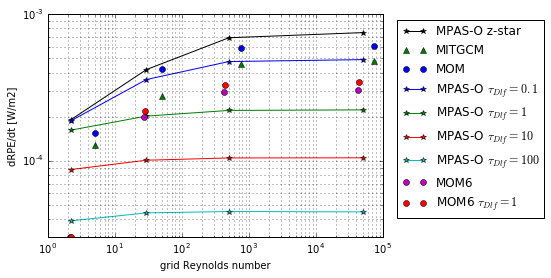

In [17]:
plt.loglog(data['gridRe'][0,:], data['meanDrpeDt'][0,4:8], '-*k')
plt.loglog(data['mitgcm_Re'][0,:], data['mitgcm_drpe_dt'][:,0], '^g')
plt.loglog(data['mom_Re'][0,:], data['mom_drpe_dt'][:,0], 'ob')

for j in range(2, int(len(data['abc'][0]) / data['m'][0,0])):
    plt.loglog(data['gridRe'][0,:], data['meanDrpeDt'][0,j*data['m'][0,0]:(j+1)*data['m'][0,0]], '-*')
    
plt.loglog(gridRe, np.mean(drpe[:,39:], 1), 'om')
#plt.loglog(gridRe_t, np.mean(drpe_t[:,9:100], 1), 'or')
plt.loglog(gridRe_p, np.mean(drpe_p[:,39:], 1), 'or')
    
plt.grid(which='both')
plt.xlabel('grid Reynolds number')
plt.ylabel('dRPE/dt [W/m2]')
plt.legend([
        'MPAS-O z-star',
        'MITGCM', 'MOM',
        r'MPAS-O $\tau_{Dlf}=0.1$',
        r'MPAS-O $\tau_{Dlf}=1$',
        r'MPAS-O $\tau_{Dlf}=10$',
        r'MPAS-O $\tau_{Dlf}=100$',
        'MOM6',
        r'MOM6 $\tau_{Dlf}=1$'],
           bbox_to_anchor=(1.5, 1.0))
plt.gca().set_xlim(1, 1e5)
plt.gca().set_ylim(3e-5, 1e-3)

# Horizontal/vertical split

Here's the original test, which was the horizontal/vertical split of different cases. This requires timestep-ly output to get a meaningful split.

In [8]:
drpe_h, drpe_v = map(np.array,
                     zip(*[np.array(lib.drpe_dt_split('../mine/internal_waves_KH{}.nc'.format(nu))) for nu in nu_h]))
vel_scale = np.array([lib.vel_scale('../mine/internal_waves_energy_KH{}.nc'.format(nu)) for nu in nu_h])
# calculate the grid Reynolds number from a grid spacing of 5km and the averaged kinetic energy over most of the run
gridRe = np.mean(vel_scale[:,10:], 1) * 5e3 / np.array(list(map(float, nu_h)))

Test case **e** uses PPM:IH3 as the remapping scheme, and is shown in the circles below.

In [12]:
drpe_h_ppm, drpe_v_ppm = lib.drpe_dt_split('../mine/internal_waves_KH0.01_e.nc')
vel_scale = lib.vel_scale('../mine/internal_waves_energy_KH0.01_e.nc')
# calculate the grid Reynolds number from a grid spacing of 5km and the averaged kinetic energy over most of the run
gridRe_ppm = np.mean(vel_scale) * 5e3 / 0.01

Test case **f** uses the (default) PLM remapping scheme, and is shown in the stars below.

In [13]:
drpe_h_plm, drpe_v_plm = lib.drpe_dt_split('../mine/internal_waves_KH0.01_f.nc')
vel_scale = lib.vel_scale('../mine/internal_waves_energy_KH0.01_f.nc')
gridRe_plm = np.mean(vel_scale) * 5e3 / 0.01

We can see that the RPE change due to remapping is about an order of magnitude higher than due to advection when remapping only uses a PLM reconstruction of the vertical tracer field.

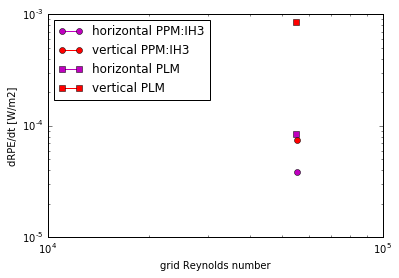

In [30]:
plt.loglog(gridRe_ppm, np.mean(drpe_h_ppm), '-om', label='horizontal PPM:IH3')
plt.loglog(gridRe_ppm, np.mean(drpe_v_ppm), '-or', label='vertical PPM:IH3')
plt.loglog(gridRe_plm, np.mean(drpe_h_plm), '-sm', label='horizontal PLM')
plt.loglog(gridRe_plm, np.mean(drpe_v_plm), '-sr', label='vertical PLM')
plt.legend(loc='upper left')
plt.xlabel('grid Reynolds number')
plt.ylabel('dRPE/dt [W/m2]')

Now we can just run all the experiments using PPM:IH3, and get the horizontal/vertical split for different grid Reynolds numbers.

In [6]:
rpe_s = [lib.drpe_dt_split('../mine/internal_waves_split_KH{}.nc'.format(nu)) for nu in nu_h]

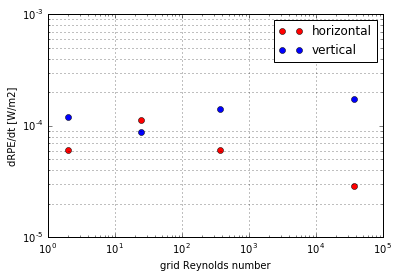

In [9]:
for k in range(len(nu_h)):
    plt.loglog(gridRe[k], rpe_s[k][0].mean(), 'or')
    plt.loglog(gridRe[k], rpe_s[k][1].mean(), 'ob')
    
plt.legend(['horizontal', 'vertical'])
plt.xlabel('grid Reynolds number')
plt.ylabel('dRPE/dt [W/m2]')
plt.grid(which='both', axis='y')
plt.grid()

# Figure 8a

This is the verbatim figure from Petersen's paper, which shows the vertical transport as a function of depth. This uses a vertical velocity computed from the continuity equation applied to the horizontal total tracer-transport velocity, so I'm not sure how to find an analogue to this from MOM6 and indeed whether it would be meaningful.

In [17]:
legends = [
        'z-star',
        r'$\tau_{Dlf}=0.1$',
        r'$\tau_{Dlf}=1$',
        r'$\tau_{Dlf}=10$',
        r'$\tau_{Dlf}=100$',
        r'$\tau_{Dlf}=1000$']

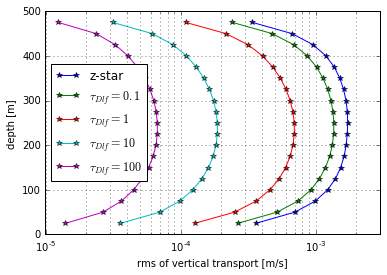

In [18]:
for j in range(1, int(len(data3['abc'][0]) / data3['m'][0,0])):
    plt.semilogx(data3['vertTransportZ'][:,j*data3['m'][0,0]], np.arange(0, 499, 25), '-*')
    
plt.gca().invert_yaxis()
plt.grid(which='both', axis='x')
plt.grid(axis='y')
plt.gca().set_xlim(.99e-5, 3e-3)
plt.gca().set_ylim(0, 500)
plt.xlabel('rms of vertical transport [m/s]')
plt.ylabel('depth [m]')
plt.legend(legends, loc='center left')

# Figure 8b

This shows the vertical transport at mid-depth as a function of grid Reynolds number. Again, this hasn't been modified to include any MOM6 data.

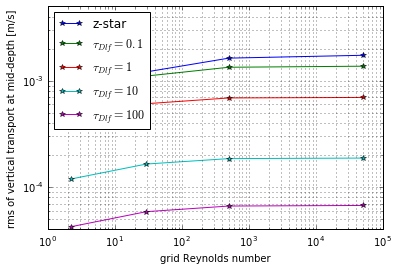

In [19]:
for j in range(1, int(len(data3['abc'][0]) / data3['m'][0,0])):
    plt.loglog(data3['gridRe'][0,:],
               data3['vertTransportZ'][int(data3['nVertLevels'][0,0] / 2),
                                       j*data3['m'][0,0]:(j+1)*data3['m'][0,0]], '-*')
    
plt.grid(which='both')
plt.gca().set_xlim(1, 1e5)
plt.gca().set_ylim(4e-5, 5e-3)
plt.xlabel('grid Reynolds number')
plt.ylabel('rms of vertical transport at mid-depth [m/s]')
plt.legend(legends, loc='upper left')